In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [4]:
x_train.dtype

dtype('uint8')

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# 标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# one hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
x_train_scaled.mean()

5.1098400794094047e-14

In [8]:
x_train_scaled.std()

0.956316274213992

In [9]:
x_test_scaled.std()

0.9570683370942685

In [10]:
x_train_scaled.shape

(60000, 784)

In [11]:
from tensorflow.keras.layers import Dense, Dropout,AlphaDropout

In [12]:
# 定义网络
model = tf.keras.Sequential()
# selu有正则化的效果. 用了selu一般不会再用正则化. 

model.add(Dense(64, activation='selu', input_shape=(784,)))


model.add(Dense(64, activation='selu'))

model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 配置
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [15]:
# 从训练过程可以观察, 使用了标准化处理的数据, 更快收敛. 
history = model.fit(x_train_scaled, y_train, batch_size=64, epochs=20, validation_data=(x_test_scaled, y_test))

Epoch 1/20
938/938 [==============================] - 4s 3ms/step - loss: 0.2972 - acc: 0.9157 - val_loss: 0.1718 - val_acc: 0.9522
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1317 - acc: 0.9608 - val_loss: 0.1385 - val_acc: 0.9604
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0923 - acc: 0.9722 - val_loss: 0.1244 - val_acc: 0.9662
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0698 - acc: 0.9783 - val_loss: 0.1206 - val_acc: 0.9695
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0549 - acc: 0.9827 - val_loss: 0.1180 - val_acc: 0.9688
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0456 - acc: 0.9850 - val_loss: 0.1164 - val_acc: 0.9706
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0369 - acc: 0.9879 - val_loss: 0.1163 - val_acc: 0.9709
Epoch 8/20
938/938 [==============================] - 3s 4ms/step - loss: 0.

In [16]:
history.history

{'loss': [0.29721924662590027,
  0.13165435194969177,
  0.09232449531555176,
  0.06977806985378265,
  0.05487952008843422,
  0.04555691406130791,
  0.0369274765253067,
  0.03195803612470627,
  0.027126789093017578,
  0.02237190119922161,
  0.02178332768380642,
  0.018883462995290756,
  0.018407398834824562,
  0.016525622457265854,
  0.014136403799057007,
  0.012635509483516216,
  0.013598555698990822,
  0.01460860762745142,
  0.012697535566985607,
  0.012036532163619995],
 'acc': [0.9157166481018066,
  0.9607999920845032,
  0.9721666574478149,
  0.9782666563987732,
  0.9826833605766296,
  0.9849500060081482,
  0.987933337688446,
  0.9895833134651184,
  0.9909499883651733,
  0.9920333623886108,
  0.9926000237464905,
  0.9937833547592163,
  0.9945833086967468,
  0.9944833517074585,
  0.9952666759490967,
  0.9958333373069763,
  0.9954833388328552,
  0.9954833388328552,
  0.9958999752998352,
  0.9959999918937683],
 'val_loss': [0.17178814113140106,
  0.13845904171466827,
  0.12444343417882

In [17]:
import pandas as pd

<AxesSubplot:>

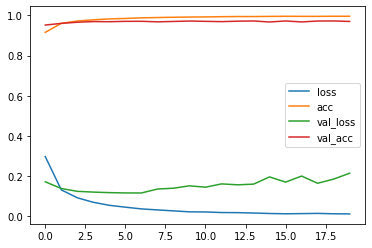

In [18]:
pd.DataFrame(history.history).plot()